<a href="https://colab.research.google.com/github/mad-havan/CODSOFT/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
sales_df=pd.read_csv("/content/Advertising.csv")

**DATA PREPROCESSING**

In [ ]:
sales_df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [ ]:
sales_df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
sales_df.value_counts()

Unnamed: 0  TV     Radio  Newspaper  Sales
1           230.1  37.8   69.2       22.1     1
138         273.7  28.9   59.7       20.8     1
128         80.2   0.0    9.2        8.8      1
129         220.3  49.0   3.2        24.7     1
130         59.6   12.0   43.1       9.7      1
                                             ..
70          216.8  43.9   27.2       22.3     1
71          199.1  30.6   38.7       18.3     1
72          109.8  14.3   31.7       12.4     1
73          26.8   33.0   19.3       8.8      1
200         232.1  8.6    8.7        13.4     1
Length: 200, dtype: int64

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
sales_df.shape

(200, 5)

In [ ]:
sales_df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
sales_df=sales_df.drop(['Unnamed: 0'],axis=1)
sales_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**DATA VISUALIZATION**

<Axes: >

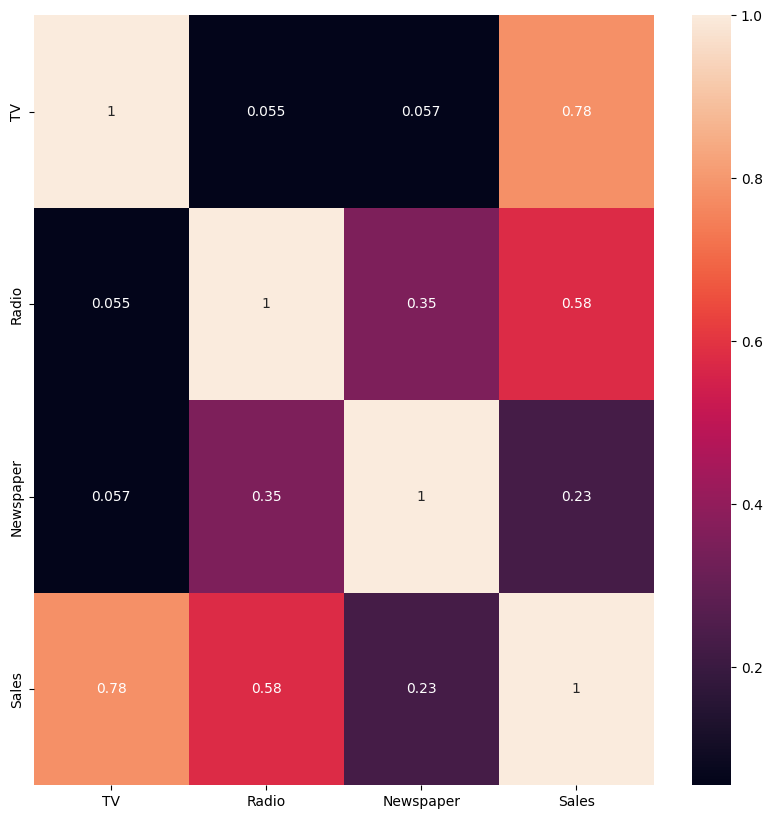

In [ ]:
cn=sales_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cn,annot=True)

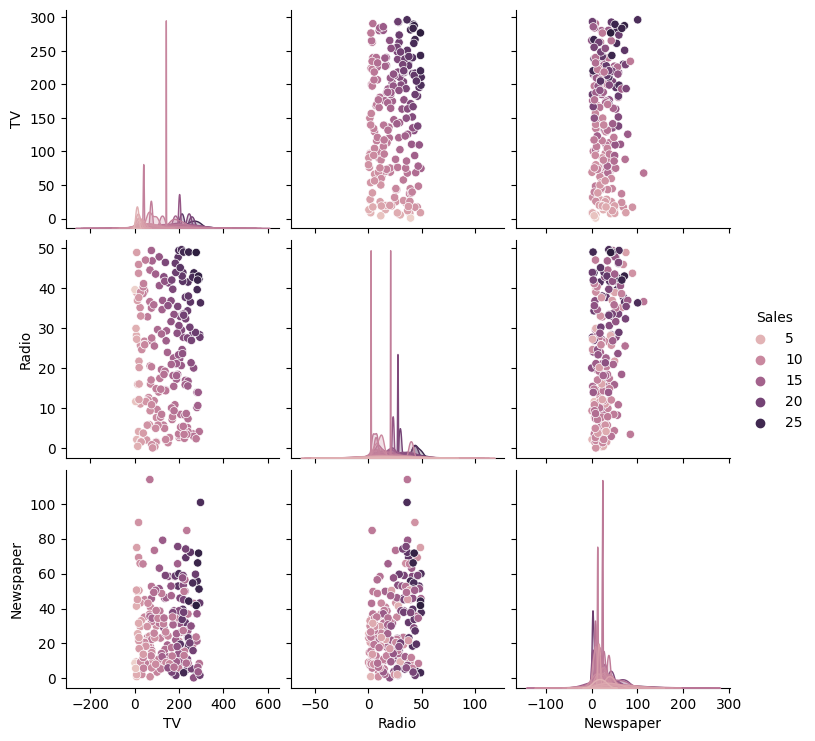

In [ ]:
sns.pairplot(sales_df, hue='Sales')

<Axes: xlabel='Sales', ylabel='Count'>

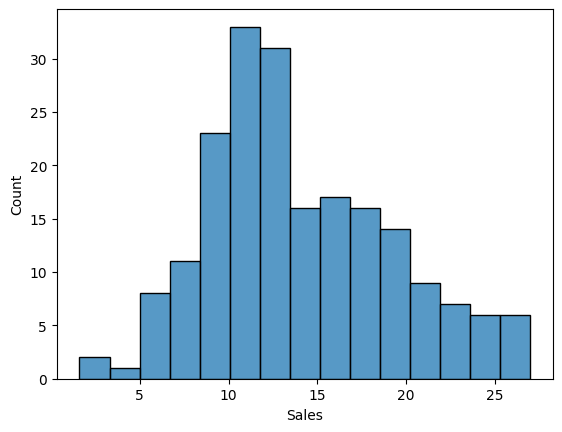

In [ ]:
sns.histplot(sales_df['Sales'],bins=15)

<Axes: xlabel='TV', ylabel='Count'>

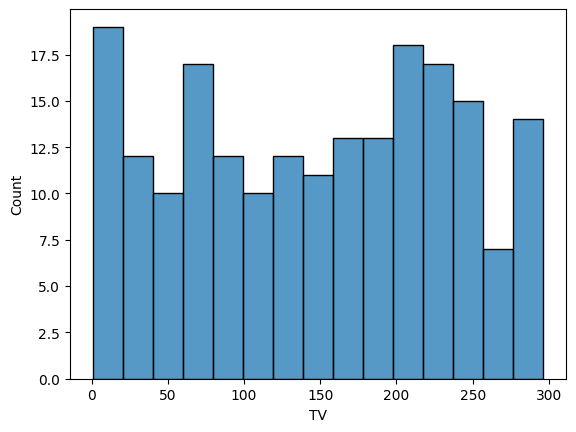

In [ ]:
sns.histplot(sales_df['TV'],bins=15)

<Axes: xlabel='Radio', ylabel='Count'>

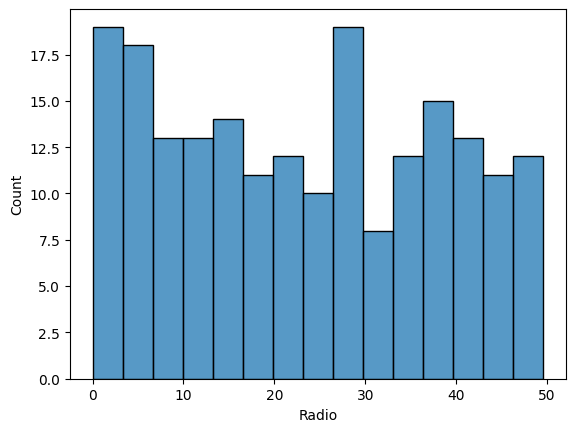

In [ ]:
sns.histplot(sales_df['Radio'],bins=15)

<Axes: xlabel='Newspaper', ylabel='Count'>

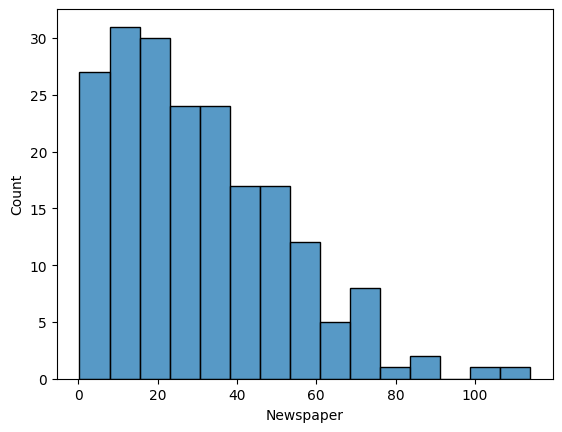

In [ ]:
sns.histplot(sales_df['Newspaper'],bins=15)

In [ ]:
X=sales_df.drop(['Sales'],axis=1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
Y=sales_df['Sales']
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

**TRAIN TEST SPLIT**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

**Using Linear Regression**
Train the model


In [ ]:
model=LinearRegression()


In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation**

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=metrics.r2_score(Y_test,y_pred)*100
accuracy

89.9438024100912

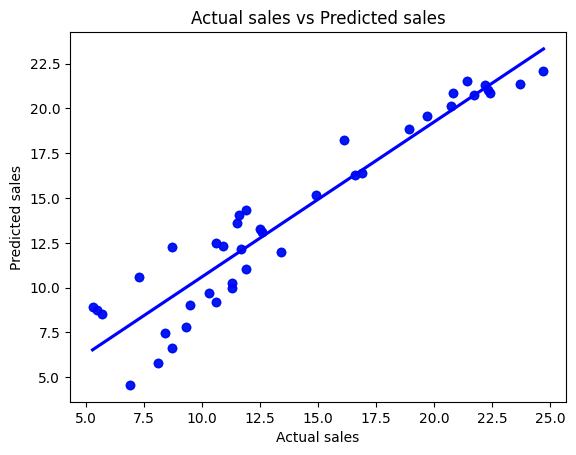

In [ ]:
plt.scatter(Y_test,y_pred)
sns.regplot(x=Y_test,y=y_pred,ci=None,color='blue')
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales vs Predicted sales')
plt.show()


In [ ]:
pred_df=pd.DataFrame({'Actual Sales':Y_test,'Predicted Sales':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Sales,Predicted Sales,Difference
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


**Using Decision Tree Regressor**

In [ ]:
model=DecisionTreeRegressor()

In [ ]:
model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=metrics.r2_score(Y_test,y_pred)*100
accuracy

94.79305172593028

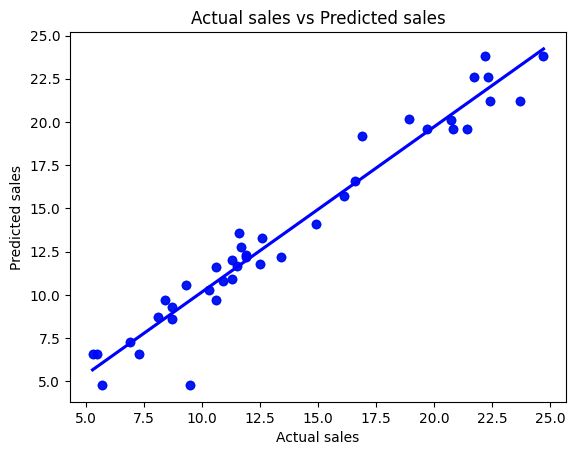

In [ ]:
plt.scatter(Y_test,y_pred)
sns.regplot(x=Y_test,y=y_pred,ci=None,color='blue')
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales vs Predicted sales')
plt.show()


In [ ]:
pred_df=pd.DataFrame({'Actual Sales':Y_test,'Predicted Sales':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Sales,Predicted Sales,Difference
95,16.9,19.2,-2.3
15,22.4,21.2,1.2
30,21.4,19.6,1.8
158,7.3,6.6,0.7
128,24.7,23.8,0.9
115,12.6,13.3,-0.7
69,22.3,22.6,-0.3
170,8.4,9.7,-1.3
174,11.5,11.7,-0.2
45,14.9,14.1,0.8


**Using Random Forest Regressor**

In [ ]:
model=RandomForestRegressor()

In [ ]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=metrics.r2_score(Y_test,y_pred)*100
accuracy

98.1513499235175

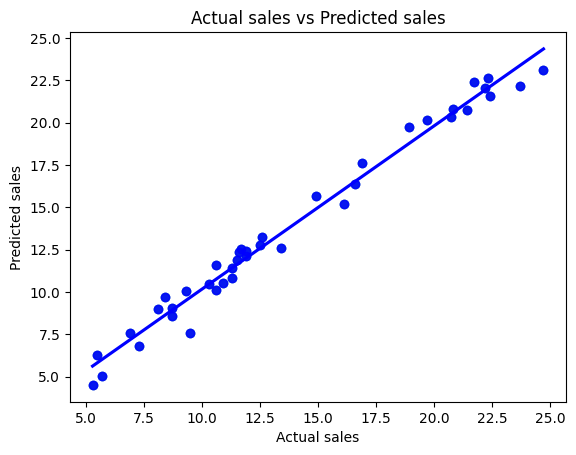

In [ ]:
plt.scatter(Y_test,y_pred)
sns.regplot(x=Y_test,y=y_pred,ci=None,color='blue')
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual sales vs Predicted sales')
plt.show()


In [ ]:
pred_df=pd.DataFrame({'Actual Sales':Y_test,'Predicted Sales':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Sales,Predicted Sales,Difference
95,16.9,17.635,-0.735
15,22.4,21.543,0.857
30,21.4,20.757,0.643
158,7.3,6.811,0.489
128,24.7,23.113,1.587
115,12.6,13.267,-0.667
69,22.3,22.644,-0.344
170,8.4,9.671,-1.271
174,11.5,11.885,-0.385
45,14.9,15.642,-0.742
